In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from utils import visualize

In [2]:
def gaussian_noise(func, std=0.02):
    def noisy_func(x):
        return func(x) + np.random.normal(0, std)
    return noisy_func

def bernoulli_noise(func):
    def noisy_func(x):
        return np.random.binomial(1, func(x))
    return noisy_func

def func(x):
    return 0.5 * (np.sin(13 * x) * np.sin(27 * x) + 1)


# Section 3: Optimistic optimization with known smoothness

In [3]:
from tree_with_known_smoothness import DOO, StoOO, HOO

def delta(node):
    return 14 * 2 ** (-1 * node.depth)

## Deterministic Optimistic Optimization (DOO)

100%|██████████| 150/150 [00:00<00:00, 827.35it/s]


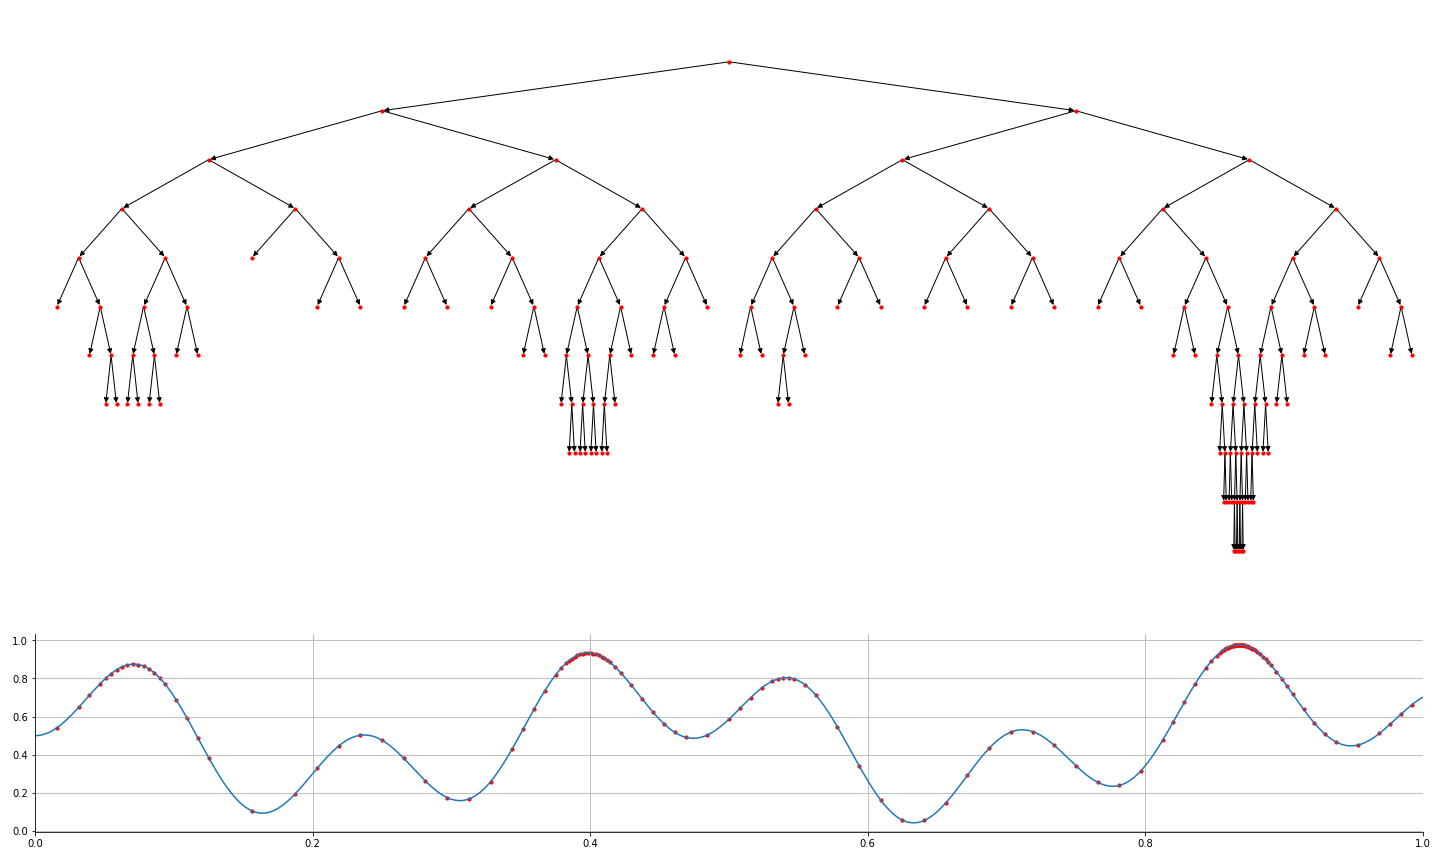

In [4]:
tree = DOO(150, 2, delta)

tree.search(func)
graph = visualize(tree, func)

## Stochastic Optimistic Optimization (StoOO)

100%|██████████| 2000/2000 [00:06<00:00, 315.47it/s]


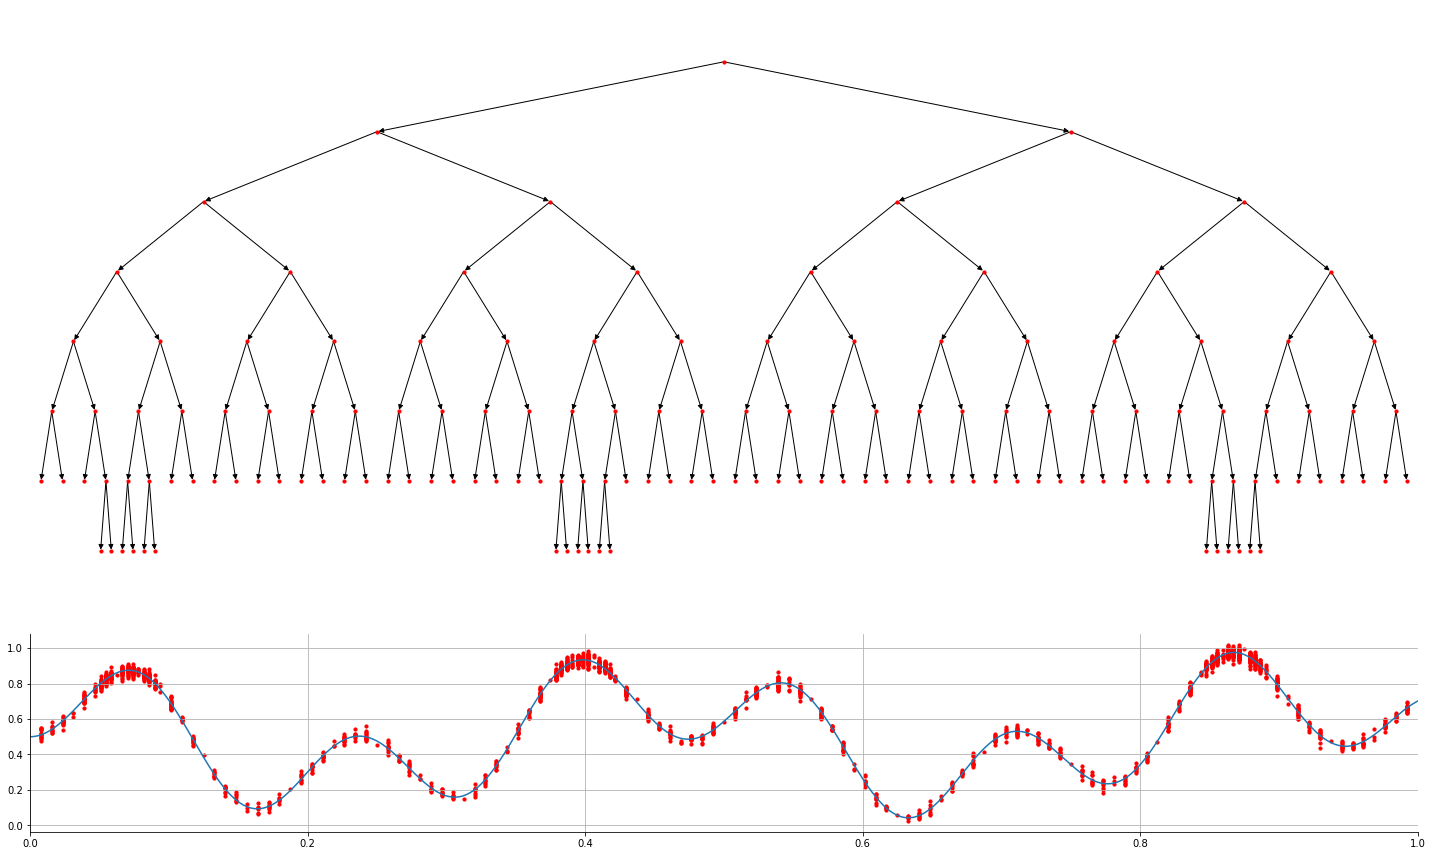

In [5]:
tree = StoOO(2000, 2, delta, 0.01)

tree.search(gaussian_noise(func))
graph = visualize(tree, func)

## Hierarchical Optimistic Optimization (HOO)

100%|██████████| 1000/1000 [00:05<00:00, 194.78it/s]


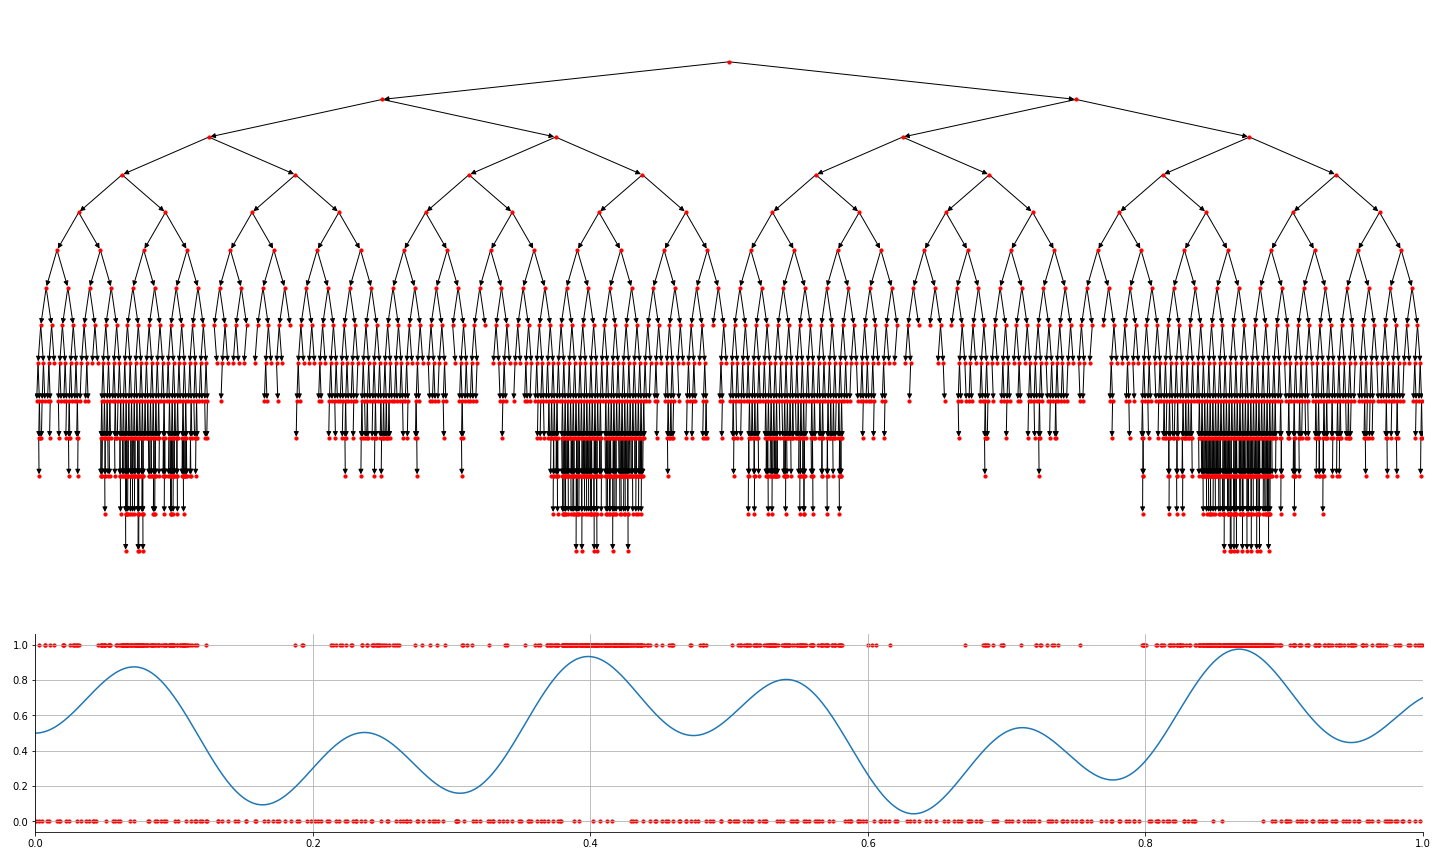

In [6]:
tree = HOO(1000, 2, delta, 0.01)

tree.search(bernoulli_noise(func))
graph = visualize(tree, func)

# Section 4: Simultaneous Optimistic Optimization

In [7]:
from tree_with_unknown_smoothness import SOO, StoSOO

def h_max(h: int):
    return int(2 * np.sqrt(h))

## Simultaneous Optimistic Optimization (SOO)

100%|██████████| 100/100 [00:00<00:00, 2180.92it/s]


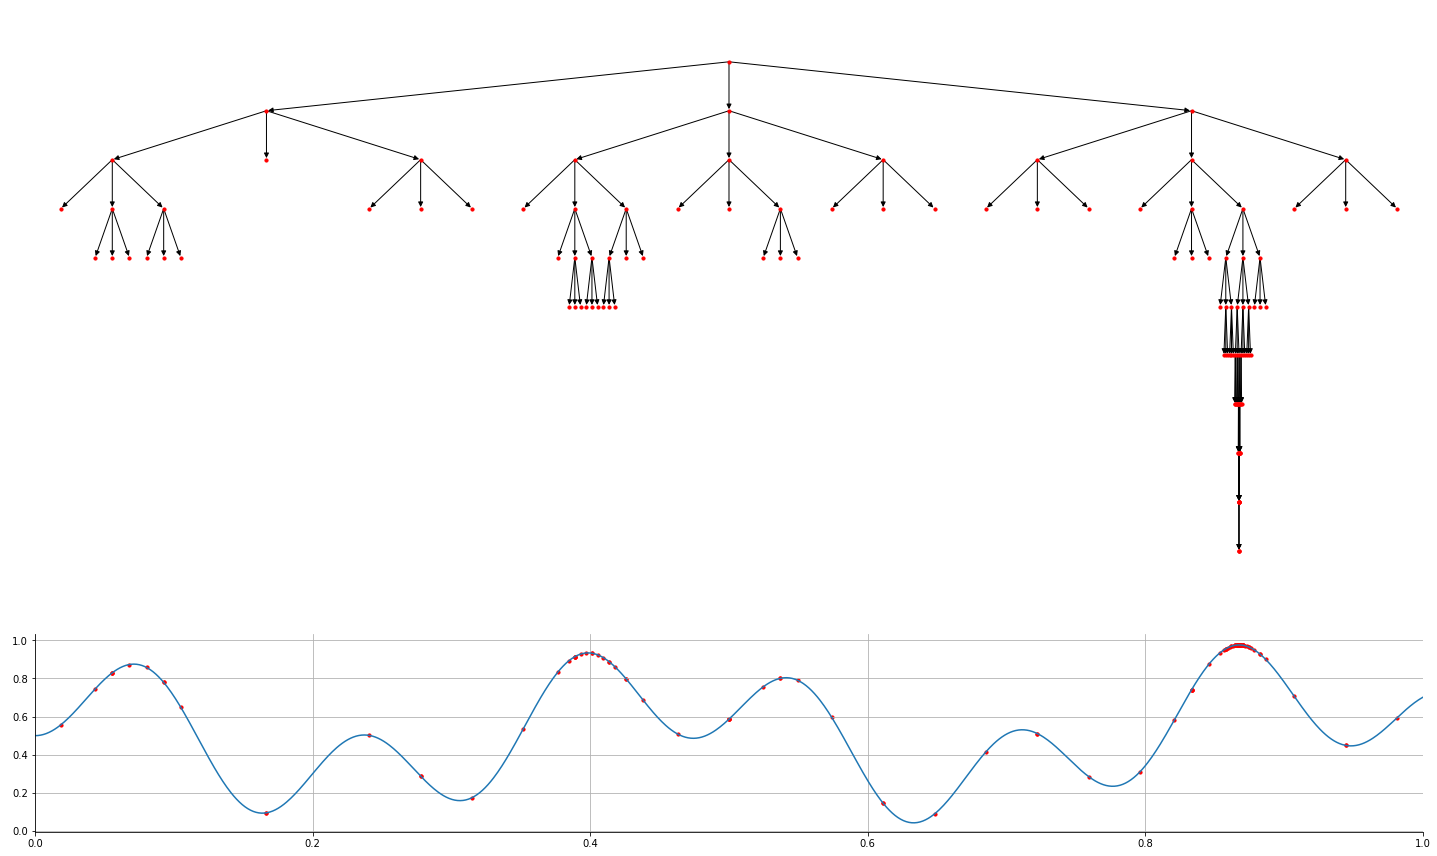

In [8]:
tree = SOO(100, 3, h_max)

tree.search(func)
graph = visualize(tree, func)

## Stochastic Simultaneous Optimistic Optimization (StoSOO)

100%|██████████| 1000/1000 [00:01<00:00, 891.65it/s]


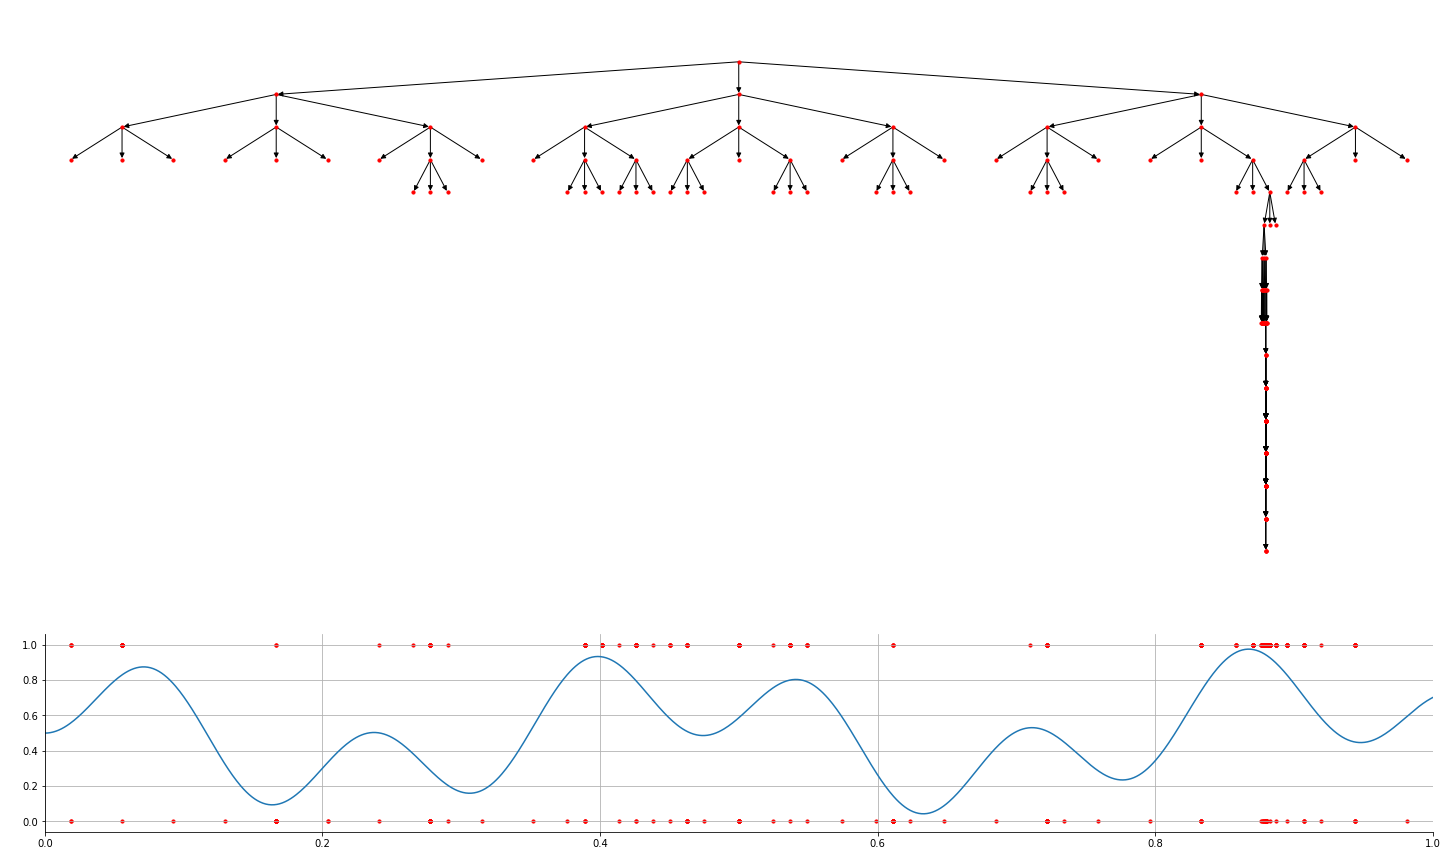

In [11]:
tree = StoSOO(1000, 3, h_max, 10, 0.1)

tree.search(bernoulli_noise(func))
graph = visualize(tree, func)

# Section 5: Optimistic planning

## Optimistic Planning algorithm (OPD)

## Open Loop Optimistic Planning (OLOP)

## Optimistic planning in MDP (OP-MDP)